In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tests.test_competing_risks_model import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simple competing risks example

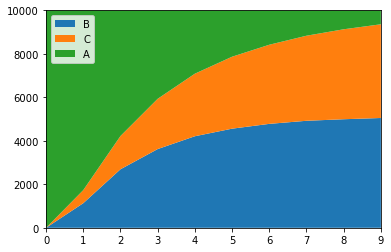

,id,sex,transition,T
0,0,1,1,3.0
1,1,1,1,4.0
2,2,0,1,1.0
3,3,0,2,1.0
4,4,1,2,1.0


In [11]:
data = create_test_data(N=10_000)
stackplot(data)
data.head()

In [12]:
data.columns

Index(['id', 'sex', 'transition', 'T'], dtype='object')

# Start some tests

In [13]:
from pymsm.competing_risks_model import CompetingRisksModel

crm = CompetingRisksModel()

In [14]:
test_fit_event_specific_model(crm=crm)

>>> Fitting Transition to State: 1, n events: 476


<lifelines.CoxPHFitter: fitted with 1000 total observations, 524 right-censored observations>
             duration col = 'T'
                event col = 'transition'
              cluster col = 'id'
          robust variance = True
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 476
   partial log-likelihood = -2987.54
         time fit was run = 2022-01-18 21:50:51 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex         0.12       1.13       0.09            -0.05             0.30                 0.95                 1.36

             z    p   -log2(p)
covariate                     
sex       1.36 0.17       2.53
---
Concordance = 0.52
Partial AIC = 5977.08
log-likelihood ratio test = 1.85 on 1 df
-log2(p) of ll-ratio test = 2.52

>>> Fitting Transition to State: 2, n events: 524


<lifelines.CoxPHFitter: fitted with 1000 total observations, 476 right-censored observations>
             duration col = 'T'
                event col = 'transition'
              cluster col = 'id'
          robust variance = True
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 524
   partial log-likelihood = -2994.84
         time fit was run = 2022-01-18 21:50:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex         0.00       1.00       0.09            -0.16             0.17                 0.85                 1.19

             z    p   -log2(p)
covariate                     
sex       0.06 0.95       0.07
---
Concordance = 0.48
Partial AIC = 5991.68
log-likelihood ratio test = 0.00 on 1 df
-log2(p) of ll-ratio test = 0.06